Project Members: Sidonia Summers, Rowan Wilson, Ben Calhoun, Abigail Simanjuntak

Country Happiness Project

CS3540: Machine Learning

Mounting to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importing necessary libraries for the project

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from past.builtins import xrange
from scipy.special import expit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE

%matplotlib inline

Adding the google path


In [ ]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Project/' # change this directory to yours
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['Country-Happiness-Project.ipynb', '.DS_Store', 'data']


Loading in the data

In [ ]:
path1 = GOOGLE_DRIVE_PATH + 'data/WorldHappinessReport2024.csv'
df_world_happiness = pd.read_csv(path1)

path2 = GOOGLE_DRIVE_PATH + 'data/CountryComparisonLargeDataset.csv'
df_country_comparison = pd.read_csv(path2)

pd.set_option('display.max_columns', None)
#display part of the dataset.
display(df_world_happiness.head())
df_world_happiness.shape
display(df_country_comparison.head())
df_country_comparison.shape
#df_world_happiness.shape

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),Doctor-to-Patient Ratio,Literacy Rate (%),Education Expenditure as % of GDP,Internet Penetration (%),Smartphone Adoption (%),Energy Consumption (TWh),Renewable Energy Share (%),Military Expenditure (in Billion USD),Number of Active Military Personnel,CO2 Emissions (Million Metric Tons),Forest Coverage (%),Number of Airports,Road Network Length (in km),Public Transport Usage (%),Human Development Index (HDI),Gender Equality Index,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
0,USA,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,2.60,100.78,5.12,84.73,88.23,4095.0,17.31,724.68,1464400.0,5156.10,31.88,13869.00,6626400.0,11.74,0.97,0.94,10.98,80.80,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,4.05,103.55,4.37,84.84,72.88,1058.4,18.60,62.13,986000.0,1660.80,49.15,1251.60,1429500.0,24.00,0.85,0.72,12.89,24.70,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,2.84,98.31,5.69,89.75,85.99,559.9,68.81,22.58,67972.5,516.78,36.18,501.50,985000.0,17.51,0.96,0.94,9.46,22.33,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,1.86,98.65,4.02,66.56,71.12,6698.0,28.94,255.52,2045900.0,9690.00,22.00,230.16,4995000.0,35.50,0.72,0.85,2.04,62.20,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,0.86,73.11,3.19,46.40,41.98,1500.0,11.50,70.01,1475768.0,2443.20,24.48,258.50,5929500.0,23.09,0.67,0.66,22.25,11.25,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65


(144, 36)

Exploring, cleaning, etc the world happiness dataset

Cleaning:
Remove rows with missing values
Overview of each feature, ensure all values make sense
Removing whitespace
Correcting mispelled words
Detecting and fixing outliers
Fixing formatting errors

Six countries we will predict:
- Usa
- Russia
- China
- India
- Canada
- Austrailia


In [ ]:
df_world_happiness.info()
df_world_happiness.shape
# missing values in "Log GDP per capita", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity","Perceptions of corruption",
# "Positive affect", and "Negative affect"

# drop rows with missing values
# df_world_happiness.dropna(inplace=True)

# renameing columns
df_world_happiness.rename(columns={'Country name': 'Country', 'year': 'Year'}, inplace=True)
df_world_happiness.info()

df_world_happiness = df_world_happiness[df_world_happiness['Country'].isin(['United States', 'Canada','India','Russia','Australia','China'])]
df_world_happiness.info()
unique_values = df_world_happiness['Country'].unique()
print(unique_values)






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB
<class 'pa

Visualizing the columns to check for any outliers

In [ ]:
display(df_country_comparison.head())

# rename USA to United States to match the world happiness dataset

df_country_comparison['Country'] = df_country_comparison['Country'].replace('USA', 'United States')

#stripping white space
df_world_happiness.columns = df_world_happiness.columns.str.strip()
df_country_comparison.columns = df_country_comparison.columns.str.strip()

merged_df = pd.merge(df_world_happiness, df_country_comparison, on=['Country', 'Year'], how='inner')

merged_df.head()
merged_df.shape

merged_df.info()

# missing values in
# social support
# freedom to make life choices
# perceptions of corruption
# generosity




,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),Doctor-to-Patient Ratio,Literacy Rate (%),Education Expenditure as % of GDP,Internet Penetration (%),Smartphone Adoption (%),Energy Consumption (TWh),Renewable Energy Share (%),Military Expenditure (in Billion USD),Number of Active Military Personnel,CO2 Emissions (Million Metric Tons),Forest Coverage (%),Number of Airports,Road Network Length (in km),Public Transport Usage (%),Human Development Index (HDI),Gender Equality Index,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
0,USA,2000,20.87,65455.0,2.28,330.34,0.58,83.42,78.39,11209.00,2.60,100.78,5.12,84.73,88.23,4095.0,17.31,724.68,1464400.0,5156.10,31.88,13869.00,6626400.0,11.74,0.97,0.94,10.98,80.80,210.98,42.37,3.55,65.52,287.40,67.41,45.27,68.81
1,Russia,2000,1.64,10923.0,3.25,141.81,0.10,72.67,69.91,534.45,4.05,103.55,4.37,84.84,72.88,1058.4,18.60,62.13,986000.0,1660.80,49.15,1251.60,1429500.0,24.00,0.85,0.72,12.89,24.70,36.47,12.53,4.63,57.54,497.50,30.90,146.10,65.00
2,Canada,2000,1.65,47932.0,1.96,36.63,0.90,79.54,84.60,5113.50,2.84,98.31,5.69,89.75,85.99,559.9,68.81,22.58,67972.5,516.78,36.18,501.50,985000.0,17.51,0.96,0.94,9.46,22.33,29.52,7.22,5.43,65.06,795.20,74.74,16.42,63.00
3,China,2000,13.64,10060.0,2.43,1446.93,0.31,58.56,76.09,459.00,1.86,98.65,4.02,66.56,71.12,6698.0,28.94,255.52,2045900.0,9690.00,22.00,230.16,4995000.0,35.50,0.72,0.85,2.04,62.20,115.80,54.00,3.68,63.13,102.90,41.75,185.32,72.14
4,India,2000,2.98,2102.1,4.87,1313.76,1.04,34.09,68.78,76.07,0.86,73.11,3.19,46.40,41.98,1500.0,11.50,70.01,1475768.0,2443.20,24.48,258.50,5929500.0,23.09,0.67,0.66,22.25,11.25,29.12,57.60,7.31,52.10,245.25,40.12,136.36,67.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         106 non-null    object 
 1   Year                                            106 non-null    int64  
 2   Life Ladder                                     106 non-null    float64
 3   Log GDP per capita                              106 non-null    float64
 4   Social support                                  104 non-null    float64
 5   Healthy life expectancy at birth                106 non-null    float64
 6   Freedom to make life choices                    101 non-null    float64
 7   Generosity                                      102 non-null    float64
 8   Perceptions of corruption                       89 non-null     float64
 9   Positive affect                            

In [ ]:
# Freedom to make life choices filling in the missing data
median_value = merged_df['Generosity'].median()
median_value = int(median_value)
merged_df['Generosity']= merged_df['Generosity'].fillna(median_value)

In [ ]:
# Social support filling in the missing data
median_value = merged_df['Social support'].median()
median_value = int(median_value)
merged_df['Social support']= merged_df['Social support'].fillna(median_value)

In [ ]:
# Perceptions of corruption filling in the missing data
median_value = merged_df['Perceptions of corruption'].median()
median_value = int(median_value)
merged_df['Perceptions of corruption']= merged_df['Perceptions of corruption'].fillna(median_value)


In [ ]:
# Freedom to make life choices filling in the missing data
median_value = merged_df['Freedom to make life choices'].median()
median_value = int(median_value)
merged_df['Freedom to make life choices']= merged_df['Freedom to make life choices'].fillna(median_value)

In [ ]:
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 45 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         106 non-null    object 
 1   Year                                            106 non-null    int64  
 2   Life Ladder                                     106 non-null    float64
 3   Log GDP per capita                              106 non-null    float64
 4   Social support                                  106 non-null    float64
 5   Healthy life expectancy at birth                106 non-null    float64
 6   Freedom to make life choices                    106 non-null    float64
 7   Generosity                                      106 non-null    float64
 8   Perceptions of corruption                       106 non-null    float64
 9   Positive affect                            

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Population (in Millions),Population Growth Rate (%),Urban Population (%),Life Expectancy (Years),Healthcare Expenditure per Capita (USD),Doctor-to-Patient Ratio,Literacy Rate (%),Education Expenditure as % of GDP,Internet Penetration (%),Smartphone Adoption (%),Energy Consumption (TWh),Renewable Energy Share (%),Military Expenditure (in Billion USD),Number of Active Military Personnel,CO2 Emissions (Million Metric Tons),Forest Coverage (%),Number of Airports,Road Network Length (in km),Public Transport Usage (%),Human Development Index (HDI),Gender Equality Index,Poverty Rate (%),Number of International Visitors (in Millions),Tourism Revenue (in Billion USD),Agricultural Land (%),Unemployment Rate (%),Labor Force Participation Rate (%),"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%)
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,1.060000e+02,106.000000,106.000000,106.000000,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,2014.462264,6.114565,10.089651,0.829477,66.060047,0.791166,0.051330,0.546397,0.690947,0.236934,7.190472,31014.214151,2.667075,549.006698,0.700094,69.669717,77.277547,3767.926698,2.597453,94.679528,4.545000,77.689528,73.467453,2355.213208,27.928491,196.351887,1.006191e+06,3310.310849,30.456792,2771.691981,3.484138e+06,21.455189,0.836509,0.846415,11.065849,35.280472,82.521698,38.206887,5.005849,61.019717,474.921698,55.073774,92.285377,69.885755
std,5.215681,1.185722,0.902424,0.168624,4.565608,0.200702,0.190152,0.301657,0.081433,0.065683,7.865594,24446.951145,1.074794,600.882860,0.415689,17.937752,5.358470,3947.853012,1.034177,9.709949,0.891148,17.555438,16.109408,2305.291536,18.709700,255.808580,7.366853e+05,3326.301020,11.001542,4924.172048,2.416617e+06,7.006244,0.113499,0.128294,5.855160,27.231909,70.832695,21.017962,1.341535,5.626838,290.923446,18.618202,65.405531,10.521994
min,2005.000000,3.248770,8.141137,0.000000,55.860001,0.000000,-0.312144,0.000000,0.479760,0.111518,1.270000,2016.000000,1.440000,24.120000,0.100000,33.600000,66.140000,69.420000,0.870000,71.260000,2.960000,42.880000,38.950000,288.600000,11.410000,21.320000,5.515800e+04,394.010000,15.260000,228.480000,8.334600e+05,11.440000,0.610000,0.630000,1.910000,9.050000,26.850000,6.730000,3.430000,47.700000,95.300000,28.560000,15.280000,57.240000
25%,2010.000000,5.144548,9.395759,0.787280,62.369999,0.745741,-0.106017,0.392448,0.617724,0.191014,1.630000,9957.500000,1.890000,37.370000,0.300000,59.940000,72.870000,441.000000,1.787500,94.505000,4.002500,65.307500,69.370000,549.450000,16.955000,27.132500,6.829312e+04,550.935000,22.135000,247.625000,1.013500e+06,17.170000,0.770000,0.720000,9.327500,10.977500,30.015000,12.970000,3.760000,58.665000,250.750000,40.000000,25.297500,63.452500
50%,2014.500000,6.332818,10.454458,0.902833,66.689999,0.849600,0.079660,0.616672,0.711184,0.233196,2.275000,27548.000000,2.340000,233.340000,0.745000,77.330000,77.725000,2755.500000,2.750000,97.680000,4.590000,86.685000,79.425000,1263.900000,19.820000,65.935000,1.194900e+06,1981.600000,31.615000,547.950000,3.160500e+06,20.345000,0.870000,0.880000,10.090000,23.370000,36.525000,45.055000,4.760000,62.025000,395.350000,54.820000,90.220000,67.400000
75%,2019.000000,7.192138,10.794382,0.928877,70.514997,0.911518,0.212246,0.780634,0.759562,0.268029,14.330000,52165.250000,3.080000,1346.535000,1.005000,83.110000,81.532500,5384.60

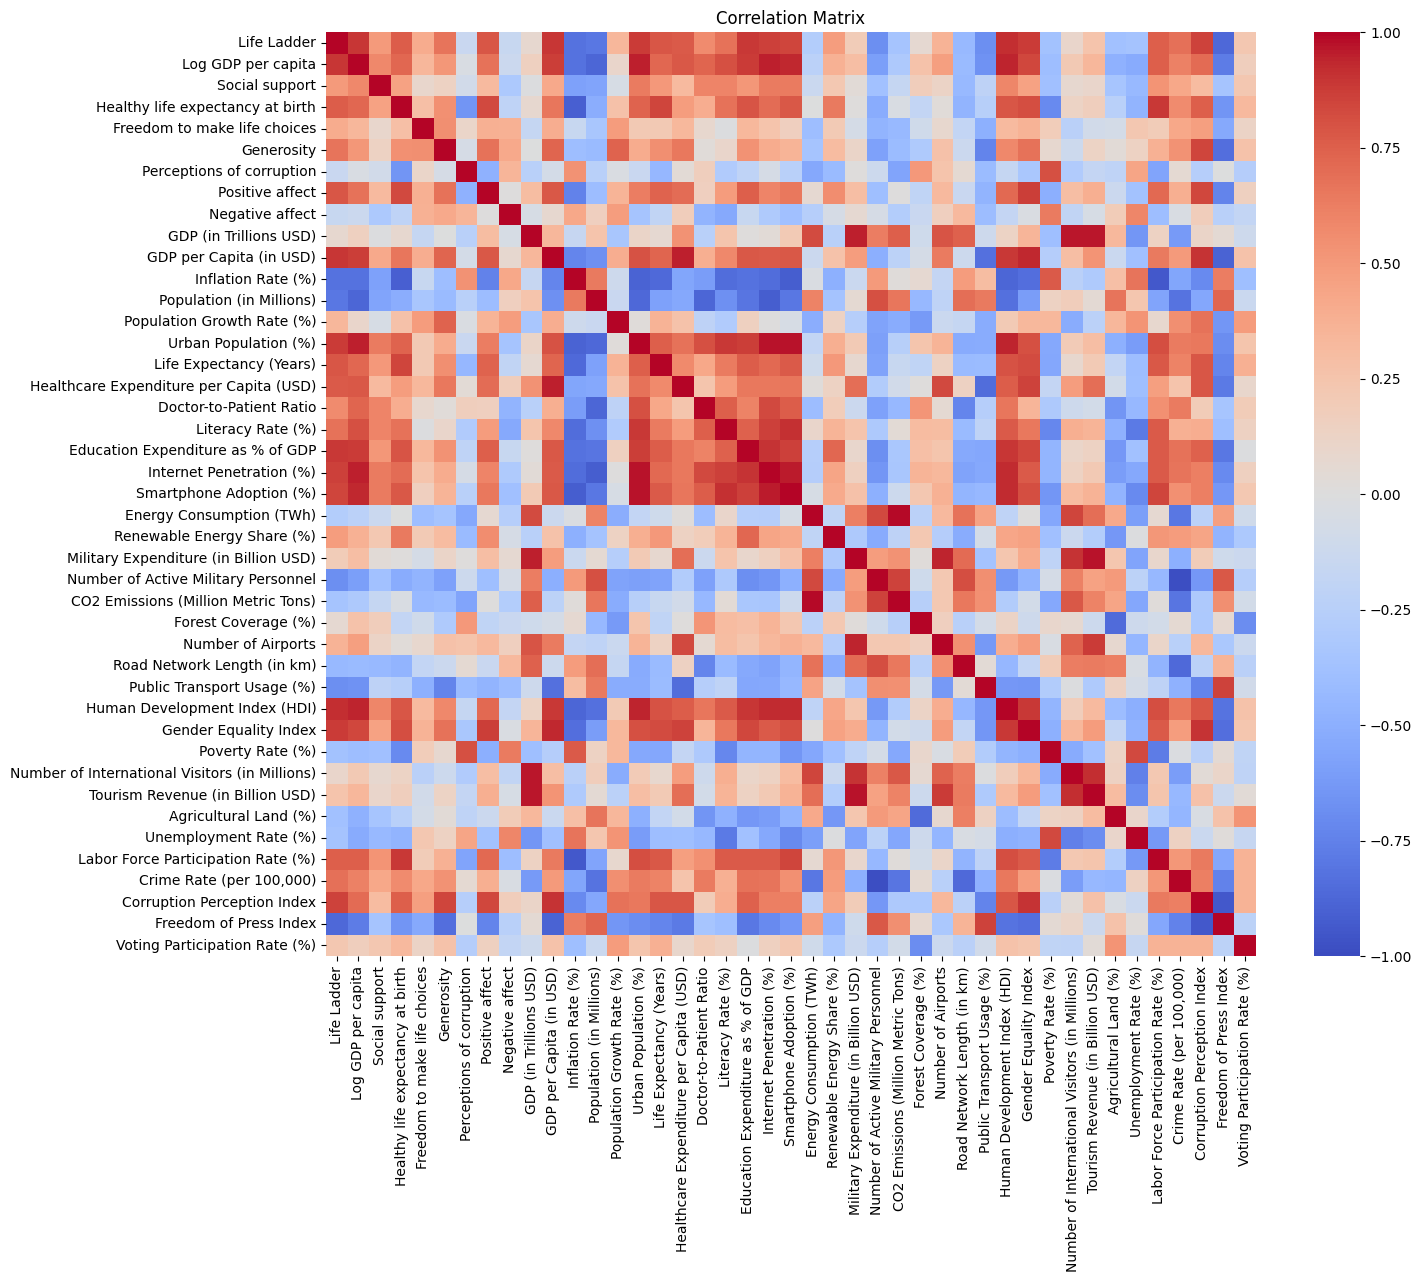

In [ ]:
# correlation matrix

# Select only numerical columns
numeric_df = merged_df.select_dtypes(include=['number'])
numeric_df= numeric_df.drop(columns=['Year'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(15, 12))  # Adjust size to fit the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

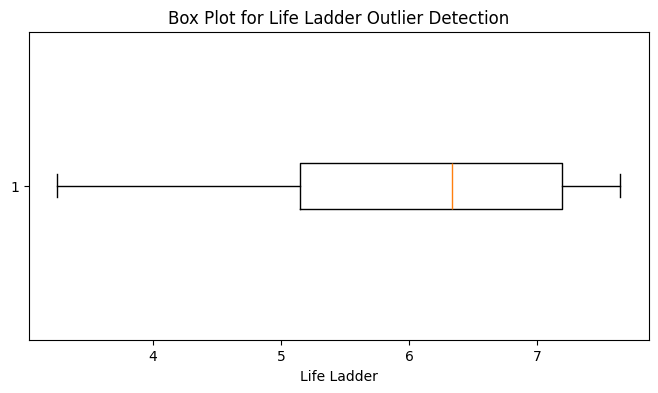

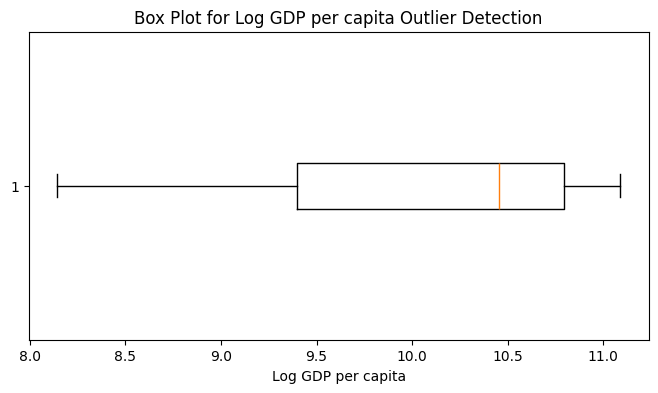

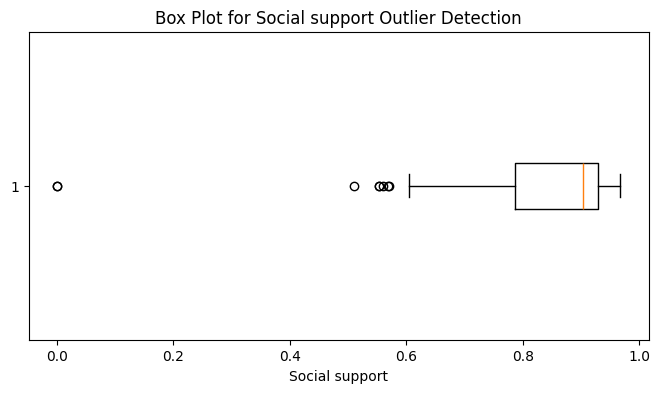

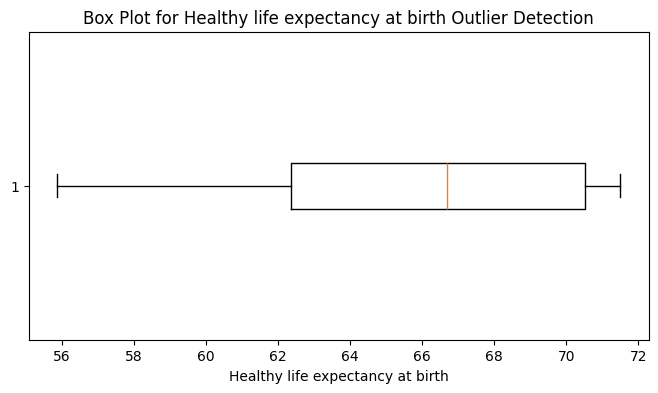

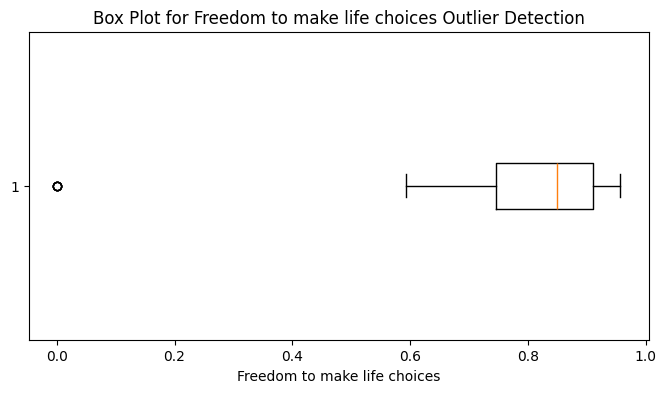

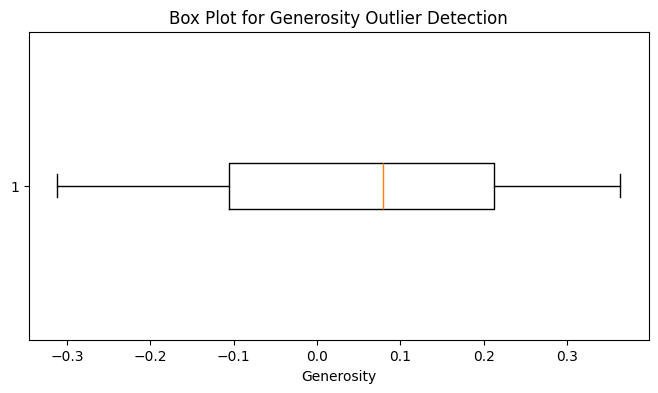

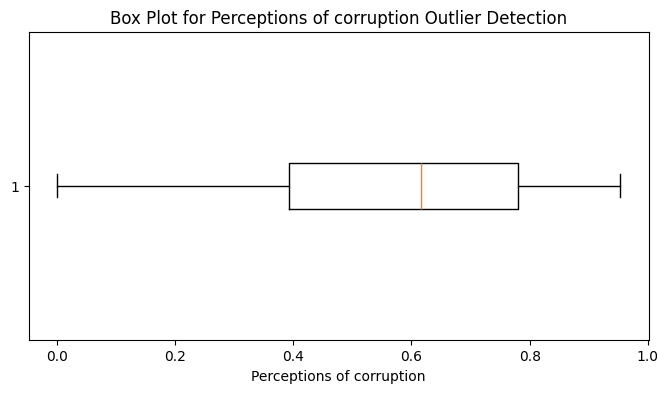

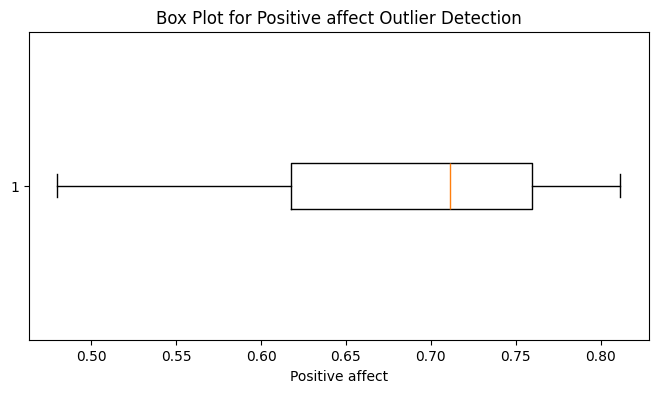

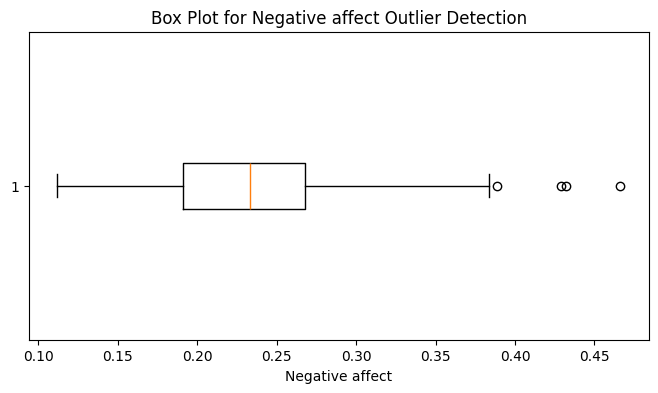

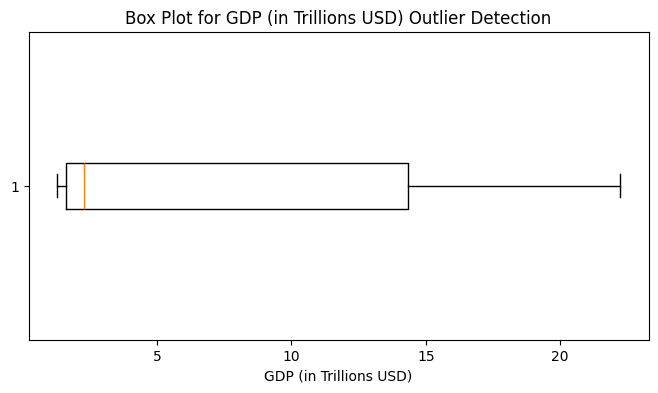

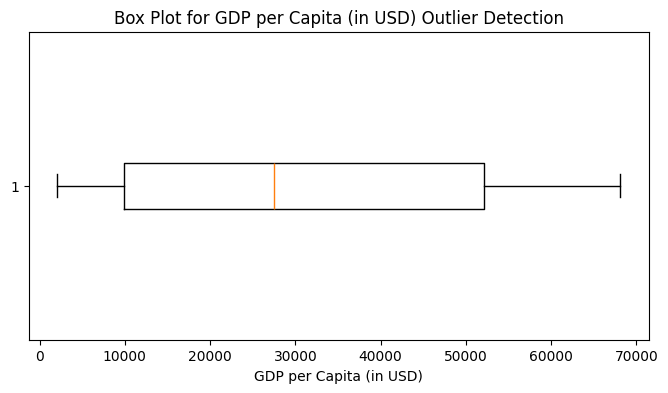

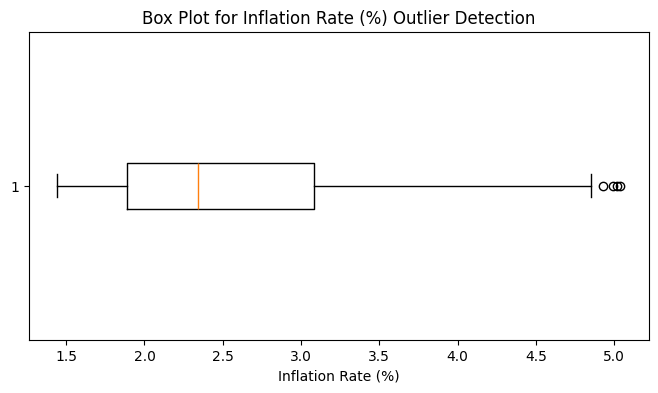

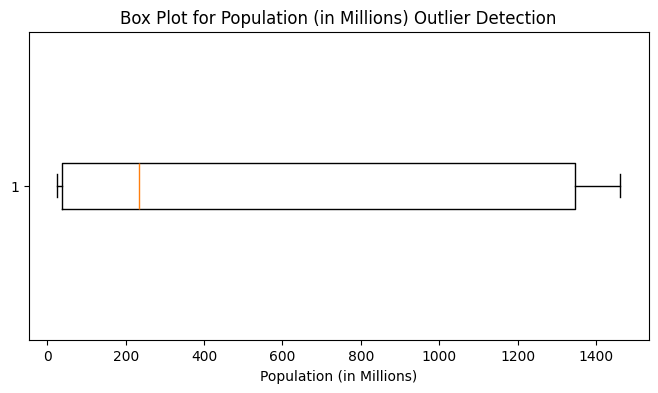

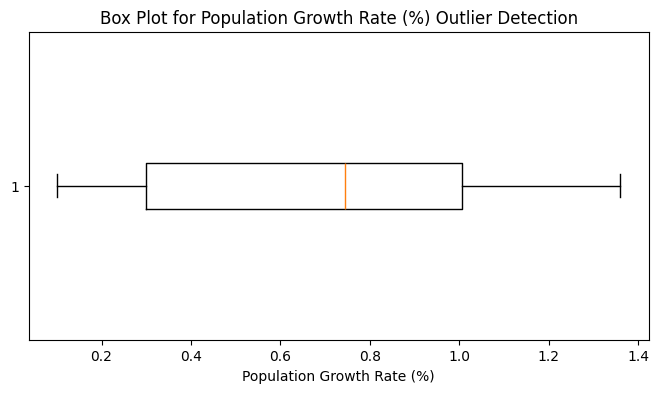

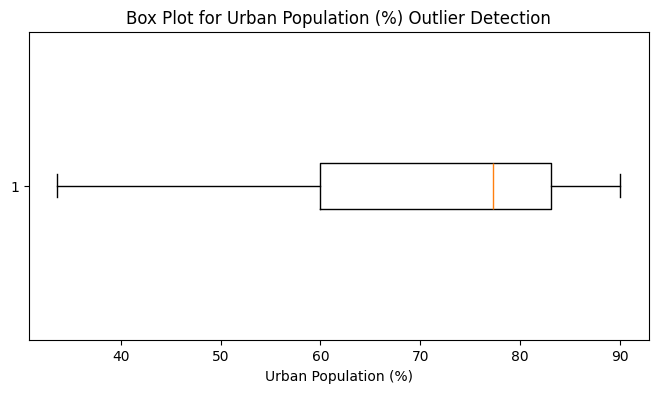

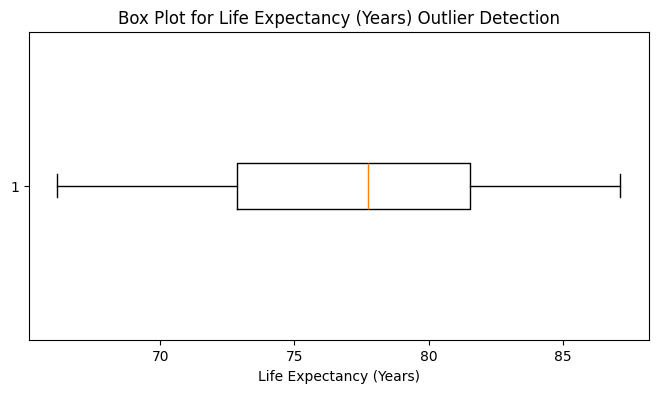

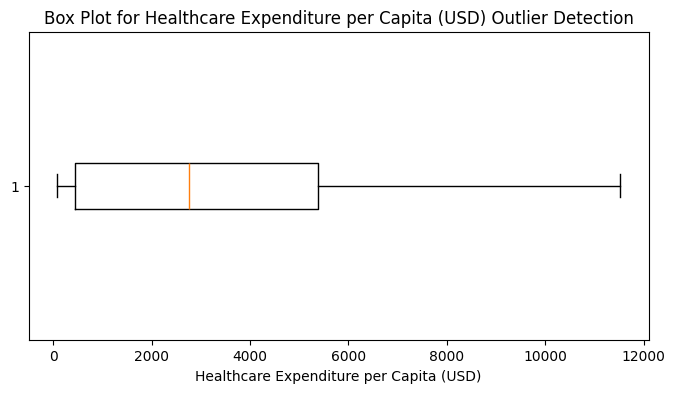

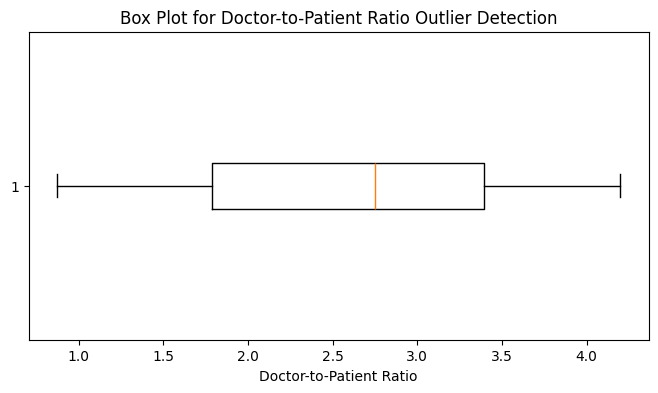

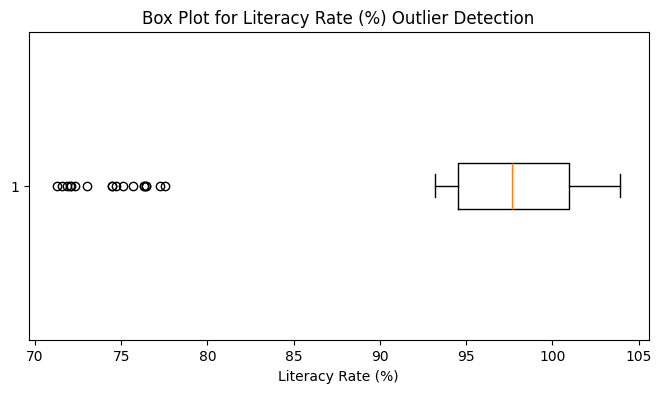

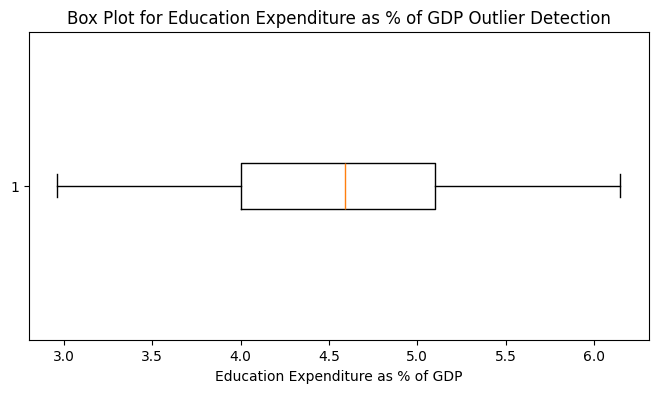

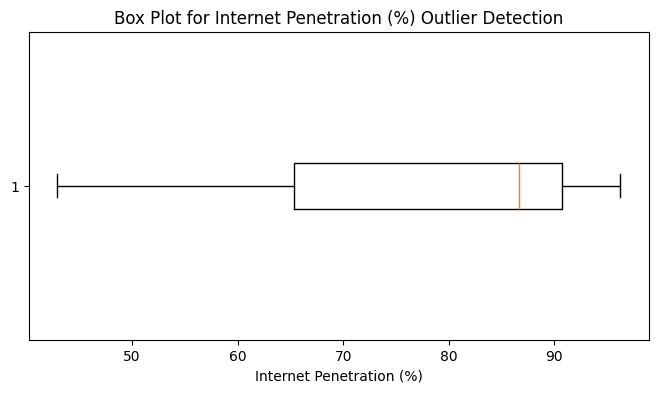

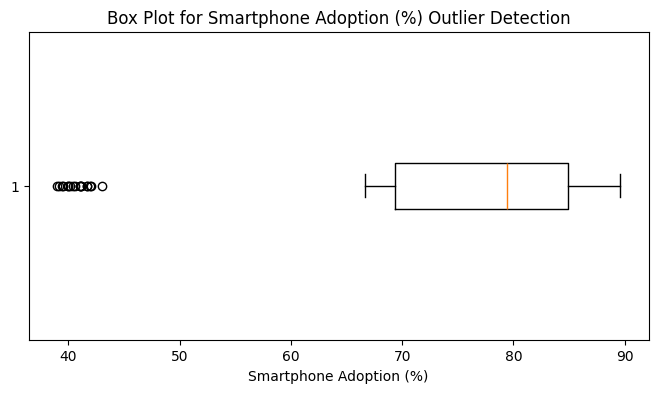

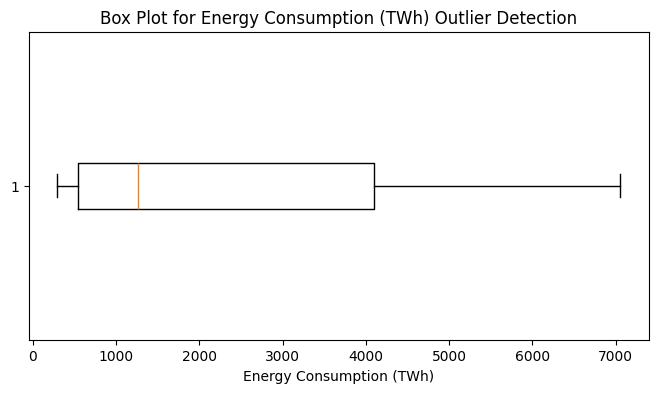

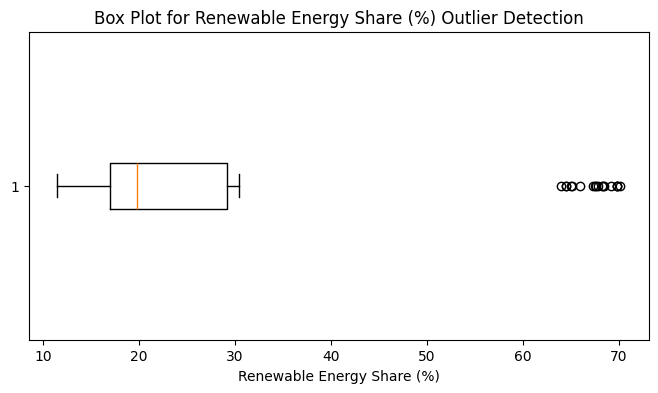

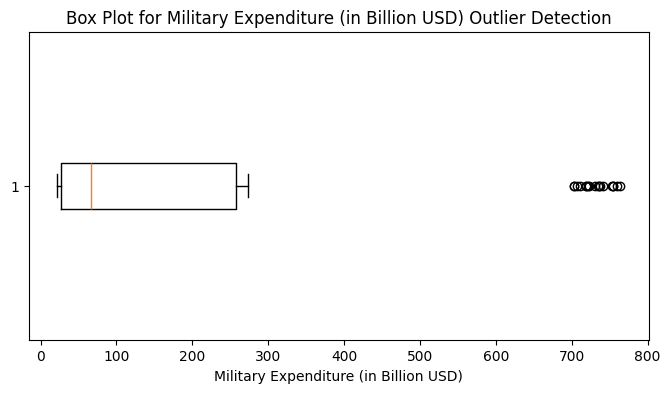

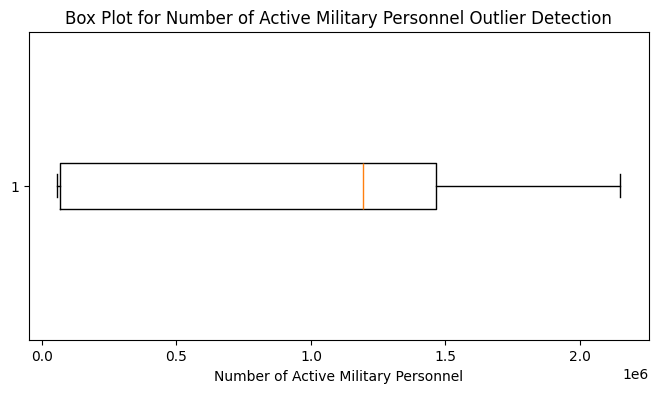

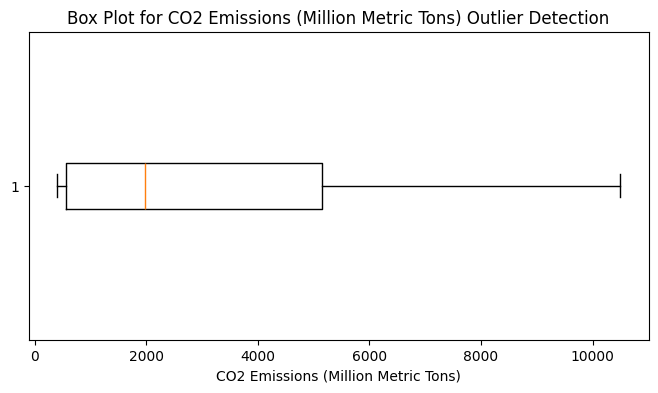

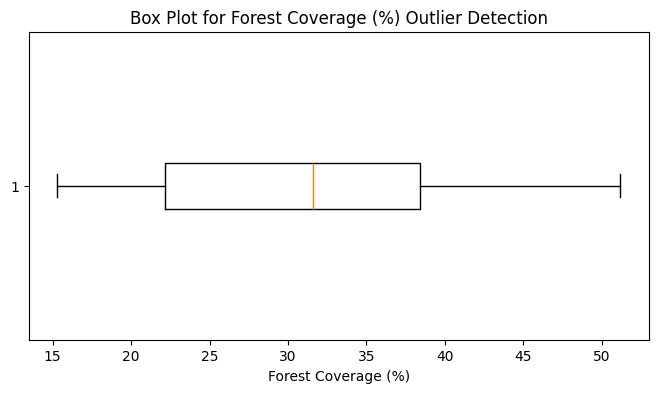

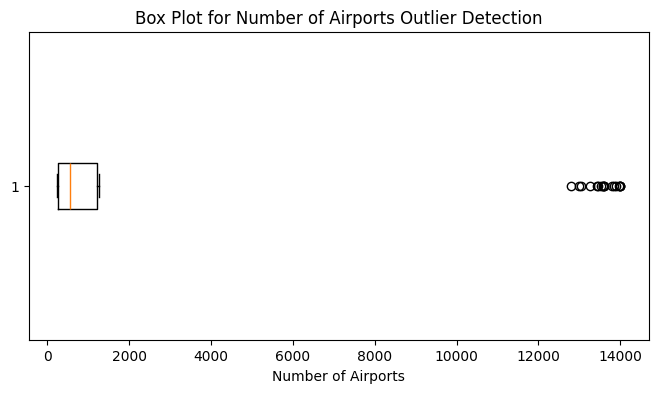

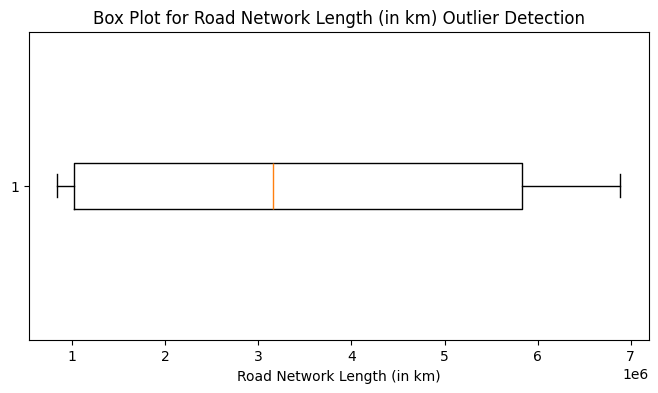

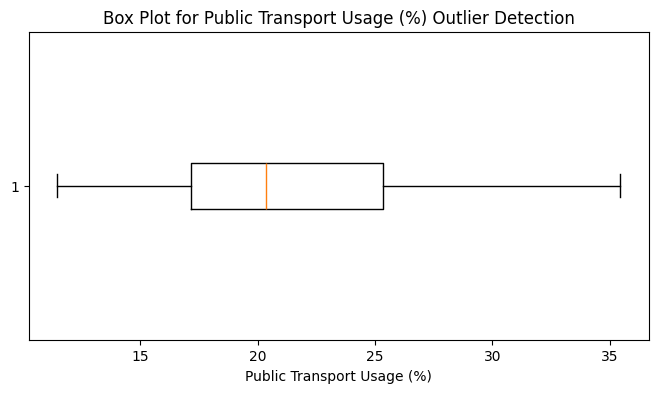

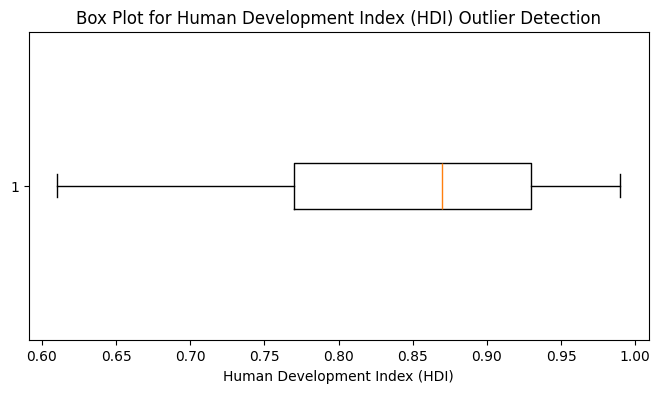

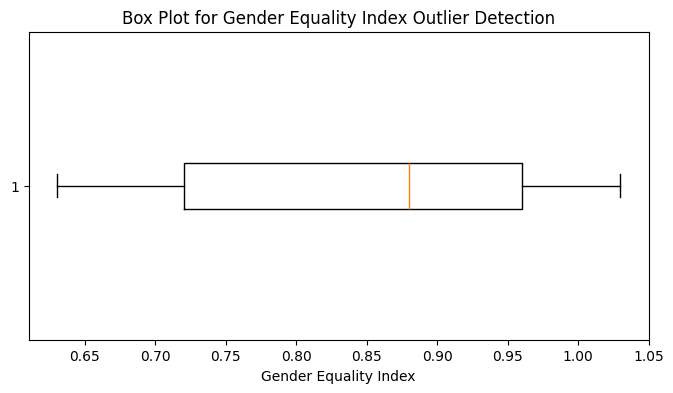

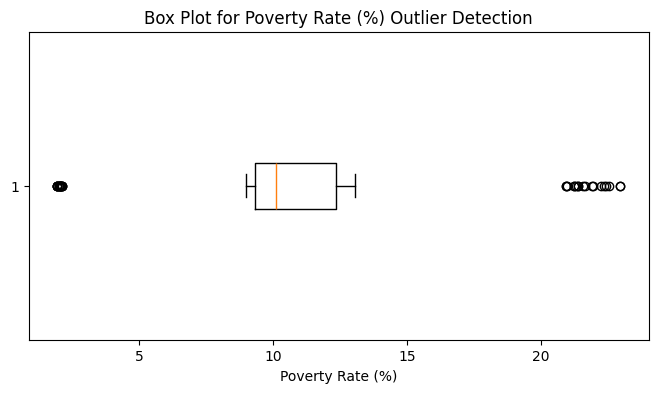

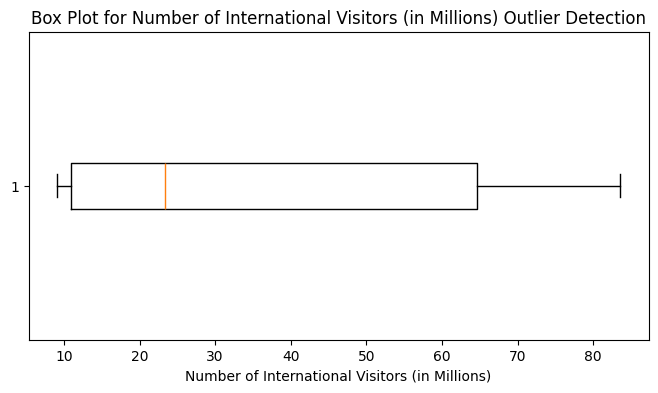

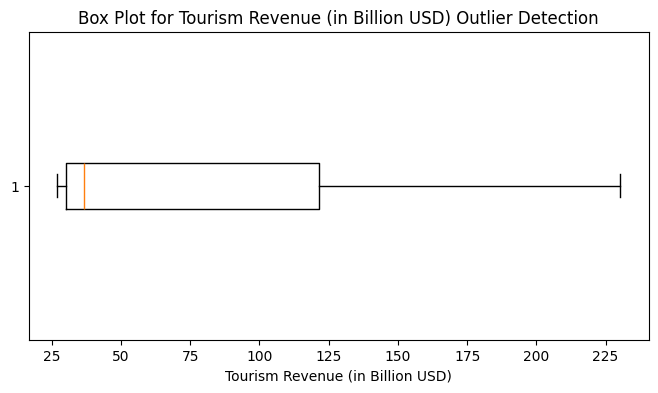

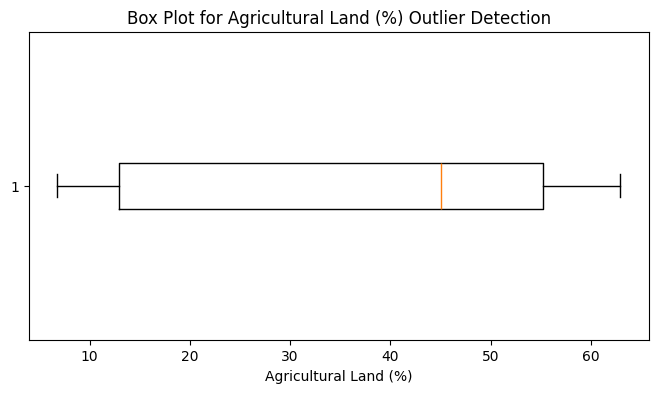

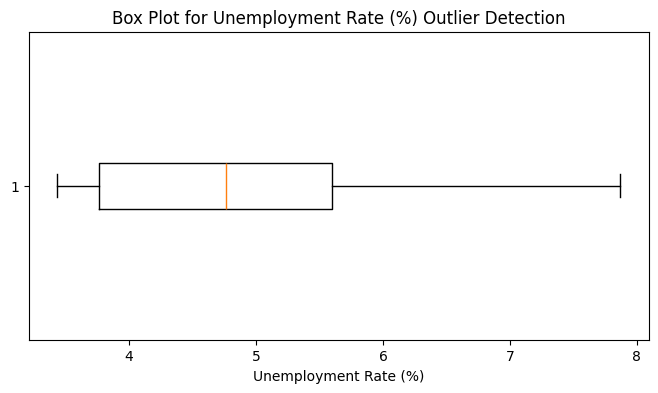

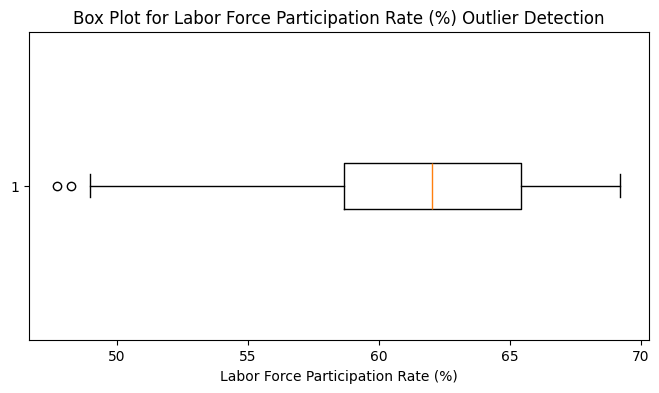

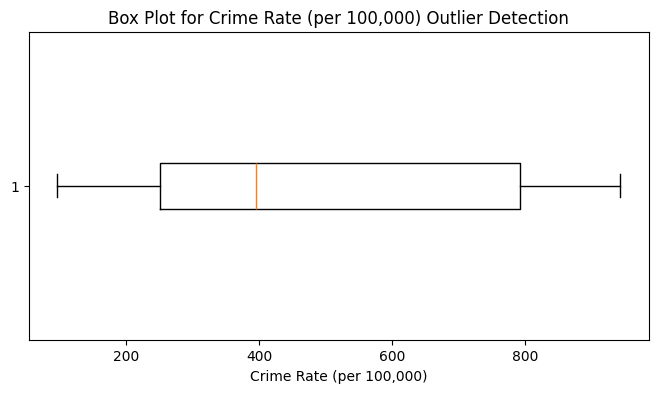

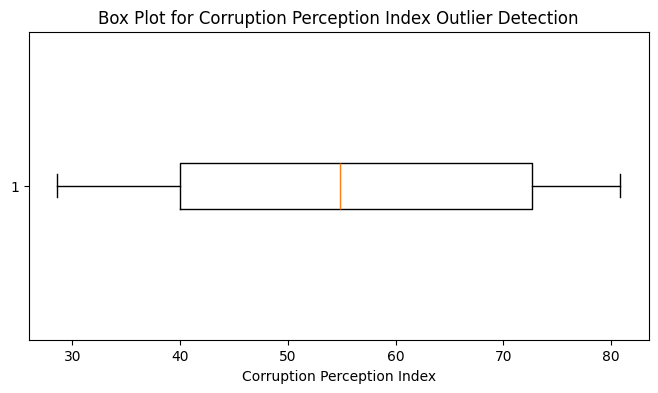

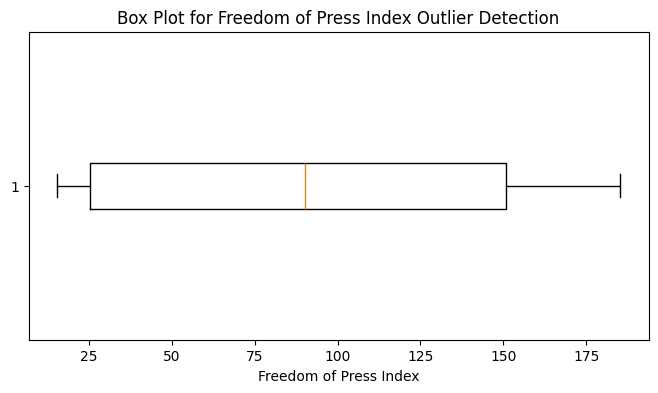

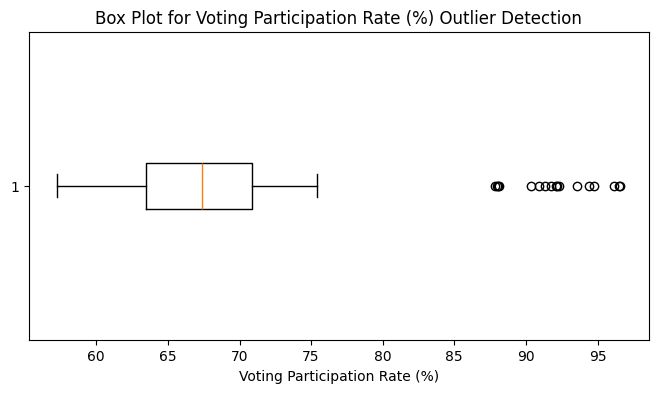

In [ ]:
# Loop through each numeric column to create box plots and show distribution
for feature in numeric_df:
    plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
    plt.boxplot(numeric_df[feature], vert=False)
    plt.title(f'Box Plot for {feature} Outlier Detection')
    plt.xlabel(feature)  # Use xlabel for horizontal box plot
    plt.show()  # Display the box plot

In [ ]:

print(merged_df.isnull().sum())
print(merged_df.dtypes)


Country                                           0
Year                                              0
Life Ladder                                       0
Log GDP per capita                                0
Social support                                    0
Healthy life expectancy at birth                  0
Freedom to make life choices                      0
Generosity                                        0
Perceptions of corruption                         0
Positive affect                                   0
Negative affect                                   0
GDP (in Trillions USD)                            0
GDP per Capita (in USD)                           0
Inflation Rate (%)                                0
Population (in Millions)                          0
Population Growth Rate (%)                        0
Urban Population (%)                              0
Life Expectancy (Years)                           0
Healthcare Expenditure per Capita (USD)           0
Doctor-to-Pa

In [ ]:
# Creating binarized column
merged_df['Positive affect binary'] = (merged_df['Positive affect'] >= 0.711183846).astype(int)
print(merged_df['Positive affect binary'].value_counts())

Positive affect binary
1    53
0    53
Name: count, dtype: int64


In [ ]:
# Creating training data and target data using positive affect as dependent variable
df_positive = merged_df
X_df = df_positive.drop(['Positive affect', 'Country', 'Year', 'Negative affect','Positive affect binary','Life Ladder','Log GDP per capita','Perceptions of corruption'], axis=1)  # Drop non-numeric or unnecessary columns
y_df = df_positive['Positive affect']  # Target variable
#
# Scaling data for gradient descent
# Use MinMax scale
# Feature scaling

scaler = MinMaxScaler()
# Fit the scaler to the features and transform them
X_scaled_df = pd.DataFrame(scaler.fit_transform(X_df), columns=X_df.columns)




In [ ]:
# Convert to NumPy arrays
X = X_scaled_df.values
y = y_df.values
# reshaping y
y = y.reshape(-1, 1)
# Creating theta matrix

# Add a bias term (intercept) to X
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept term
theta = np.zeros((X.shape[1], 1))

In [ ]:
# Checking the shapes of the terms
X.shape, y.shape, theta.shape

((106, 39), (106, 1), (39, 1))

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept = False)
model.fit(X, y)
model.coef_ # get theta coefficients (model params)

array([[ 4.56865550e-01, -3.12347117e-03,  1.30235054e-01,
         2.51034708e-02,  2.04867764e-02,  5.44882543e-02,
         3.05890748e-01, -1.12721590e-01,  2.52508205e-01,
         4.35429544e-03,  1.36438821e-02, -5.17600192e-07,
        -1.67507995e-01,  9.80565309e-02, -9.17083006e-02,
         4.69347093e-02,  5.04997873e-02,  1.49301456e-02,
        -3.03142324e-01,  8.90020216e-02,  1.29663462e-01,
         1.19412745e-01, -4.78361238e-02, -9.28850562e-03,
         1.80723349e-01, -7.97087675e-02,  6.94466112e-02,
        -1.14194710e-01,  1.00411836e-02, -2.51655873e-02,
         2.23633766e-02, -2.42281206e-01,  4.92595553e-02,
        -1.03867189e-01,  7.89257660e-03, -1.14561933e-01,
         1.12419550e-01,  6.35257334e-02, -5.16782626e-02]])

In [ ]:
# function to compute cost of a given solution
def calcVectorizedCost(X, Y, theta):
    inner = np.dot(((np.dot(X, theta)) - Y).T, (np.dot(X, theta)) - Y)
    return inner / (2 * len(X))

In [ ]:
calcVectorizedCost(X, y, theta)

array([[0.24198839]])

In [ ]:
# Gradient descent function for vectorized form
def gradientDescent(X, Y, theta, eta, iters):

    """
    Performs gradient descent optimization on a set of data

    X: Features matrix
    Y: Output matrix
    theta: matrix of variable weights
    eta: learning rate
    iters: number of times to iterate the algorithm (epochs)
    output: return optimized theta and the cost array for each iteration (epoch).
    """
    cost = np.zeros(iters)

    for i in range(iters):
        gradients = 2 * (np.dot(X.T, ((np.dot(X, theta)) - Y)))
        theta = theta - eta * gradients
        cost[i] = calcVectorizedCost(X, Y, theta)
    return theta, cost

In [ ]:
# trying hyper parameters # must use low learning rate so the model can converge
#eta = 0.000001
eta = 0.000001
iters = 1000

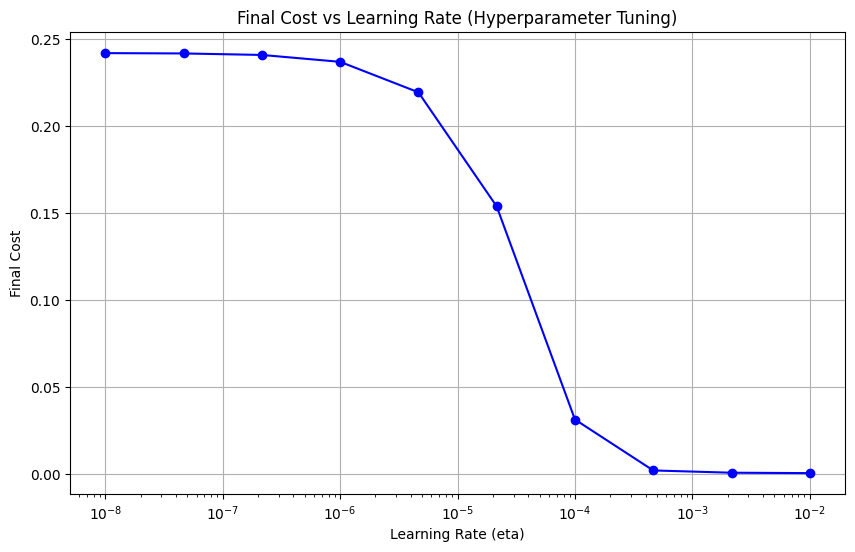

Optimal Learning Rate (eta): 0.01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fine-tune learning rate (eta)
def tune_eta(X, y, theta, eta_values, iters):
    final_costs = []

    for eta in eta_values:
        # Run gradient descent for each eta
        _, cost_history = gradient_descent(X, y, theta, eta, iters)

        # Store the final cost
        final_costs.append(cost_history[-1])

    return final_costs

# Initialize variables
theta = np.zeros((X.shape[1], 1))  # Assuming X is already prepared with intercept term if needed
iters = 1000

# Range of learning rates to test
eta_values = np.logspace(-8, -2, 10)  # Values from 10^-8 to 10^-2

# Perform tuning for eta
final_costs = tune_eta(X, y, theta, eta_values, iters)

# Plot Final Cost vs Learning Rate
plt.figure(figsize=(10, 6))
plt.plot(eta_values, final_costs, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Log scale for learning rate
plt.xlabel('Learning Rate (eta)')
plt.ylabel('Final Cost')
plt.title('Final Cost vs Learning Rate (Hyperparameter Tuning)')
plt.grid()
plt.show()

# Find optimal eta
optimal_eta = eta_values[np.argmin(final_costs)]
print(f"Optimal Learning Rate (eta): {optimal_eta}")

In [ ]:
# greater than 0.000001 theta values diverge rather than converge, overshooting the cost function
optTheta, cost = gradientDescent(X, y, theta, eta, iters)
print (optTheta)

[[0.05951963]
 [0.05042325]
 [0.03908933]
 [0.04946239]
 [0.0324857 ]
 [0.01583689]
 [0.02535727]
 [0.02080687]
 [0.02292416]
 [0.02934952]
 [0.03694557]
 [0.03135561]
 [0.01837678]
 [0.02953413]
 [0.04141126]
 [0.02945456]
 [0.0377765 ]
 [0.03947593]
 [0.01786009]
 [0.01802525]
 [0.01284033]
 [0.02673309]
 [0.01700076]
 [0.02456322]
 [0.00957935]
 [0.02595315]
 [0.02528427]
 [0.0346684 ]
 [0.03187657]
 [0.02620304]
 [0.01992481]
 [0.01503357]
 [0.03341804]
 [0.02246228]
 [0.03649137]
 [0.02673863]
 [0.03043026]
 [0.02685068]
 [0.01853346]]


<ipython-input-60-1210d87ba4b3>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost[i] = calcVectorizedCost(X, Y, theta)


In [ ]:
calcVectorizedCost(X, y, optTheta)

array([[0.00543307]])

In [ ]:
# apply lasso regression

In [ ]:
predicted_values = np.dot(X, optTheta)
predicted_values_flat = predicted_values.flatten()  # Ensure it's a 1D array

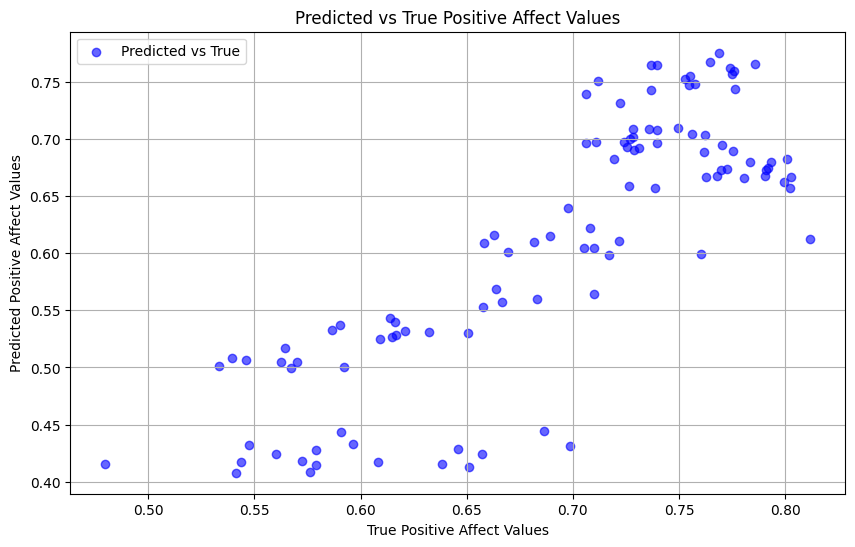

In [ ]:
# Get the true values for Positive Affect
true_values = df_positive['Positive affect'].values  # Make sure to get the true values

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(true_values, predicted_values_flat, color='blue', label='Predicted vs True', alpha=0.6)
plt.xlabel('True Positive Affect Values')
plt.ylabel('Predicted Positive Affect Values')
plt.title('Predicted vs True Positive Affect Values')
plt.legend()
plt.grid()
plt.show()


The model is underestimating the true Positive Affect Values. This approach includes all 44 features. We should try implementing using a smaller number of features/polynomial features if the data is nonlinear.

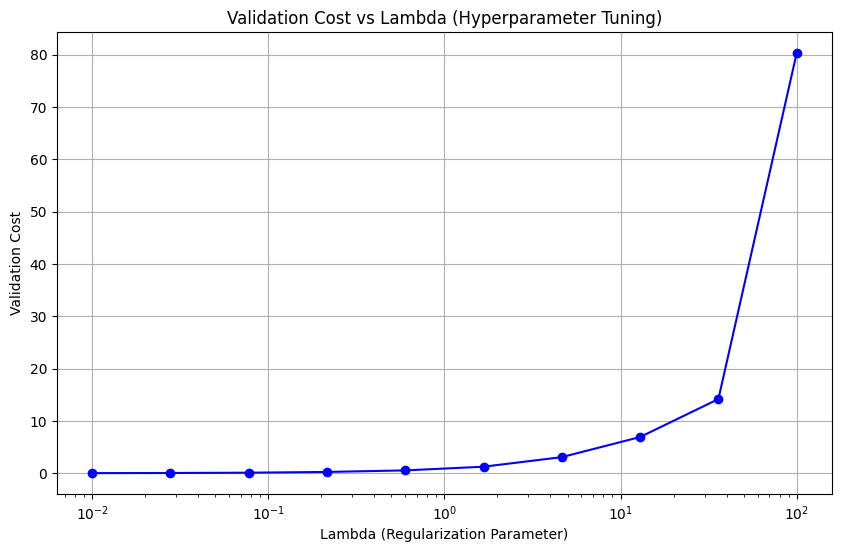

Optimal Lambda: 0.01


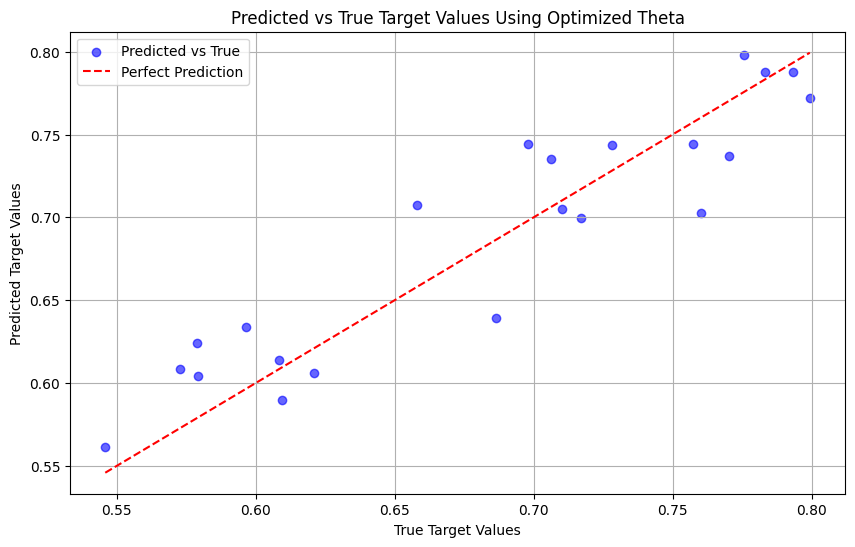

In [ ]:
#testing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

# Assuming X and y are your features and target variables
# Step 1: Split into Train, Validation, and Test Sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=5)  # 20% test
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=5)  # 20% validation

# Initialize theta
theta = np.zeros((X_train.shape[1], 1))

# Define Cost Function with L1 Penalty
def calc_lasso_cost(X, y, theta, lambda_val):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2) + lambda_val * np.sum(np.abs(theta))
    return cost

# Gradient Descent for Lasso
def lasso_gradient_descent(X, y, theta, eta, iters, lambda_val):
    m = len(y)
    cost_history = []

    for i in range(iters):
        predictions = X.dot(theta)
        errors = predictions - y

        # Calculate the gradient with L1 penalty
        gradient = (1 / m) * (X.T.dot(errors) + lambda_val * np.sign(theta))

        # Update theta
        theta = theta - eta * gradient

        # Calculate and store the cost
        cost = calc_lasso_cost(X, y, theta, lambda_val)
        cost_history.append(cost)

    return theta, cost_history

# Hyperparameter Tuning for Lambda
def tune_lambda(X_train, y_train, X_val, y_val, theta, eta, iters, lambda_values):
    val_costs = []

    for lambda_val in lambda_values:
        # Train model with current lambda
        opt_theta, _ = lasso_gradient_descent(X_train, y_train, theta, eta, iters, lambda_val)

        # Evaluate on validation set
        val_cost = calc_lasso_cost(X_val, y_val, opt_theta, lambda_val)
        val_costs.append(val_cost)

    return val_costs

# Hyperparameter Range
lambda_values = np.logspace(-2, 2, 10)  # Values from 0.01 to 100
eta = 0.025
iters = 1000

# Perform Hyperparameter Tuning
val_costs = tune_lambda(X_train, y_train, X_val, y_val, theta, eta, iters, lambda_values)

# Plot Validation Cost vs Lambda
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, val_costs, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Log scale for lambda
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Validation Cost')
plt.title('Validation Cost vs Lambda (Hyperparameter Tuning)')
plt.grid()
plt.show()

# Find optimal lambda
optimal_lambda = lambda_values[np.argmin(val_costs)]
print(f"Optimal Lambda: {optimal_lambda}")

# Step 2: Train the model with the optimal lambda
opt_theta, _ = lasso_gradient_descent(X_train, y_train, theta, eta, iters, optimal_lambda)

# Step 3: Make predictions on the test set
predictions = X_test.dot(opt_theta)

# Convert predictions to a flat array if necessary
predictions_flat = predictions.flatten()

# Step 4: Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_flat, color='blue', label='Predicted vs True', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Predicted vs True Target Values Using Optimized Theta')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Ensure the intercept term is included in the feature matrix
X_train_full = np.hstack([np.ones((X_train_full.shape[0], 1)), X_train_full])  # Add intercept (bias) column

# Initialize theta with the correct number of parameters (including intercept)
theta_full = np.zeros((X_train_full.shape[1], 1))

# Train the model with the optimal lambda
opt_theta_full, _ = lasso_gradient_descent(X_train_full, y_train_full, theta_full, eta, iters, optimal_lambda)

# Assuming X_df is your DataFrame with the original feature names
# Add intercept term name to the feature names list
feature_names = ['intercept'] + list(X_df.columns)  # Include intercept term name

# Get the number of coefficients in the model (this includes the intercept term)
num_coeffs = opt_theta_full.shape[0]

# Map feature names to their corresponding theta values
theta_dict = {feature_names[i]: opt_theta_full[i][0] for i in range(num_coeffs)}

# Sort coefficients by absolute value, excluding the intercept
sorted_coeffs = sorted(theta_dict.items(), key=lambda item: abs(item[1]), reverse=True)

# Exclude the intercept term from the sorted list for display
sorted_coeffs = [item for item in sorted_coeffs if item[0] != 'intercept']

# Print the sorted features with their coefficients
print("Most Influential Features for Predicting Happiness:")
for feature, coeff in sorted_coeffs:
    print(f"{feature}: {coeff:.6f}")

Most Influential Features for Predicting Happiness:
GDP (in Trillions USD): 0.125251
Social support: 0.102506
Healthy life expectancy at birth: 0.102506
Freedom to make life choices: 0.102506
Generosity: 0.102506
Urban Population (%): 0.099997
Population (in Millions): -0.063275
Population Growth Rate (%): 0.054766
GDP per Capita (in USD): 0.041354
Inflation Rate (%): 0.022397


In [ ]:
# grab top 6 features
top_n = 0
top_features = [feature for feature, _ in sorted_coeffs[0:6]]
print(top_features)

X_selected = X_df[top_features]

scaler = MinMaxScaler()
# Fit the scaler to the features and transform them
X_scaled_df = pd.DataFrame(scaler.fit_transform(X_selected), columns=X_selected.columns)

# Convert to NumPy arrays
X = X_scaled_df.values
y = y_df.values
# reshaping y
y = y.reshape(-1, 1)
# Creating theta matrix



# Add a bias term (intercept) to X
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept term
theta = np.zeros((X.shape[1], 1))

X.shape, y.shape, theta.shape


['GDP (in Trillions USD)', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Urban Population (%)']


((106, 7), (106, 1), (7, 1))

<ipython-input-60-1210d87ba4b3>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost[i] = calcVectorizedCost(X, Y, theta)


[[0.24858324]
 [0.07529679]
 [0.1527833 ]
 [0.11442031]
 [0.1417963 ]
 [0.08549289]
 [0.06855295]]
Cost on Test Data: [[0.00102111]]


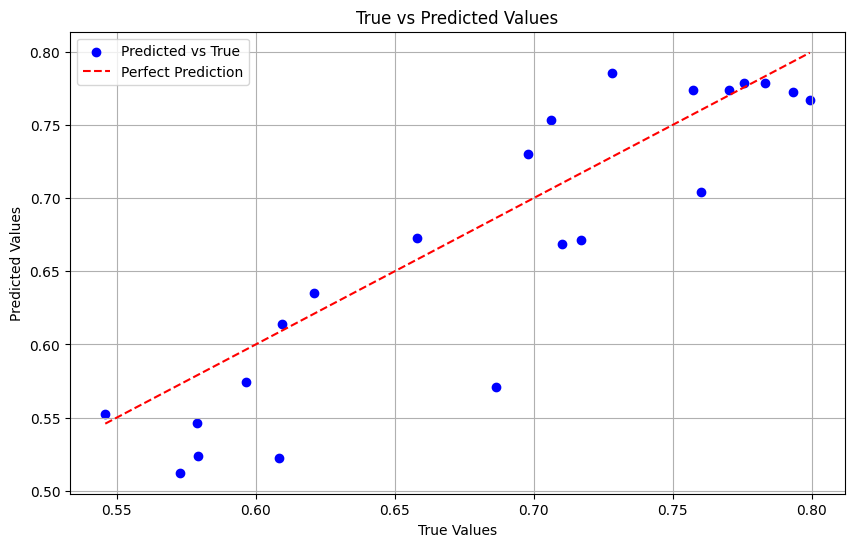

In [ ]:
# Training the data
eta = 0.00005
iters = 1000

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=5)  # 20% test

#42
# getting optimal theta
optTheta, cost = gradientDescent(X_train_val, y_train_val, theta, eta, iters)

print(optTheta)
calcVectorizedCost(X, y, optTheta)
predictions = X_test.dot(optTheta)

# Calculate the cost on the test set
test_cost = calcVectorizedCost(X_test, y_test, optTheta)
print("Cost on Test Data:", test_cost)

# Plotting True vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted vs True')

# Plot a line for the perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Labeling the axes
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()







<ipython-input-60-1210d87ba4b3>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost[i] = calcVectorizedCost(X, Y, theta)


Average Cost from 5-fold Cross-Validation: 0.0010993442979525016
Cost on Test Data: [[0.0005175]]


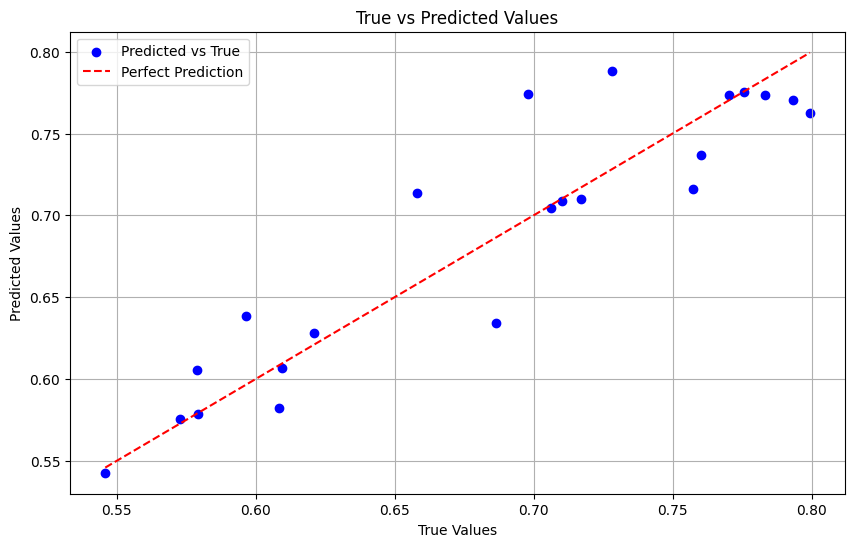

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

# Define the function for k-fold cross-validation
def k_fold_cross_validation(X, y, k, eta, iters):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    costs = []

    for train_index, val_index in kf.split(X):
        # Split data into training and validation sets for the current fold
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Initialize theta (parameters)
        theta = np.zeros((X_train.shape[1], 1))

        # Train the model using gradient descent
        optTheta, cost = gradientDescent(X_train, y_train, theta, eta, iters)

        # Evaluate the model on the validation set
        val_cost = calcVectorizedCost(X_val, y_val, optTheta)
        costs.append(val_cost)

    # Compute the average cost across all folds
    avg_cost = np.mean(costs)
    return avg_cost

# Set k for k-fold cross-validation
k = 5  # 5-fold cross-validation

# Hyperparameters for gradient descent
eta = 0.00005
iters = 1000

# Perform k-fold cross-validation
avg_cost = k_fold_cross_validation(X, y, k, eta, iters)

print(f"Average Cost from {k}-fold Cross-Validation: {avg_cost}")

# Now, you can proceed to training on the full dataset after cross-validation
# Train the model with the optimal theta from gradient descent
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Train the model on the full training set
theta = np.zeros((X_train_val.shape[1], 1))  # Initialize theta
optTheta, cost = gradientDescent(X_train_val, y_train_val, theta, eta, iters)

# Make predictions using the optimal theta on the test set
predictions = X_test.dot(optTheta)

# Calculate the cost on the test set
test_cost = calcVectorizedCost(X_test, y_test, optTheta)
print("Cost on Test Data:", test_cost)

# Plotting True vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Predicted vs True')

# Plot a line for the perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

# Labeling the axes
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)  # RMSE
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 0.035160977873474865
Mean Squared Error (MSE): 0.002042224063673895
Root Mean Squared Error (RMSE): 0.045190973254333605
R-squared (R²): 0.6873081122988904


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Machine Learning Technique: Support Vector Machines
1. Feature Scaling
2. RFE for Feature Selection
3. Model Training
4. Evaluation Metrics


In [ ]:
# Creating the data frames for X and y
X_df2 = df_positive.drop(['Positive affect', 'Country', 'Year', 'Negative affect','Positive affect binary','Life Ladder','Log GDP per capita'], axis=1)  # Drop non-numeric or unnecessary columns
y_df2 = df_positive['Positive affect binary']  # Target variable
scaler = MinMaxScaler()
# Fit the scaler to the features and transform them
X_scaled_df2 = pd.DataFrame(scaler.fit_transform(X_df2), columns=X_df2.columns)
x_train, x_test, y_train, y_test = train_test_split(X_scaled_df2, y_df2, test_size=0.2, random_state=42)
print("Training x:", x_train.shape,"y:", y_train.shape)
print("Testing x:", x_test.shape,"y:", y_test.shape)

Training x: (84, 39) y: (84,)
Testing x: (22, 39) y: (22,)


Selected Features: Index(['GDP per Capita (in USD)', 'Healthcare Expenditure per Capita (USD)',
       'Education Expenditure as % of GDP', 'Gender Equality Index',
       'Corruption Perception Index', 'Freedom of Press Index'],
      dtype='object')
Feature Ranking: [30  9 19 14 27 21  1  5 18  2 13 12  1 23 32  1 16 20 26  6 15  7 24 17
  8 29  4  3  1 33 28 11 34 25 22 10  1  1 31]
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.91      0.83      0.87        12

    accuracy                           0.86        22
   macro avg       0.86      0.87      0.86        22
weighted avg       0.87      0.86      0.86        22



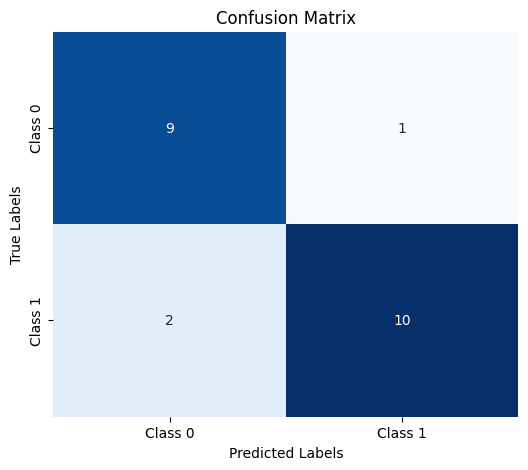

In [ ]:
# Initialize Support Vector Machine (SVM) model with regularization (C)
svm = SVC(kernel='linear', C=0.1, class_weight='balanced')  # 'C' is the regularization parameter, and 'linear' kernel

# Initialize RFE with SVM as the estimator, and select top 6 features
rfe = RFE(estimator=svm, n_features_to_select=6)  # Change n_features_to_select as needed

# Fit RFE on the training data to select features
rfe.fit(x_train, y_train)

# Get the selected features (True means selected)
selected_features = rfe.support_

# Print the selected features with actual column names
selected_feature_names = x_train.columns[selected_features]
print("Selected Features:", selected_feature_names)

# Get the ranking of features (1 means selected)
print("Feature Ranking:", rfe.ranking_)

# Create a new training set with only the selected features
x_train_selected = x_train.loc[:, selected_feature_names]

# Train the SVM model using only the selected features
svm.fit(x_train_selected, y_train)

# Transform the test set using the selected features
x_test_selected = x_test.loc[:, selected_feature_names]

# Make predictions on the test set
y_pred = svm.predict(x_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()





# lower c to prevent overfitting

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=X.shape[1])  # Keep all components for now
pca.fit(X_scaled)

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# The components of PCA tell us which original features contribute to each principal component
# The larger the variance, the more important the component
top_n = 5
top_features = np.argsort(explained_variance)[::-1][:top_n]

print(f"Top {top_n} Components Based on Explained Variance:", top_features)

Top 5 Components Based on Explained Variance: [0 1 2 3 4]
